## Problem Statement: 

#### Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State Not Spam, b) Abnormal State Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [7]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df = df.drop(['Email No.'], axis=1)

In [21]:
X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

# print(len(y)) # total
# print(sum(y)) # one count
# print(len(y) - sum(y)) # zero count

from sklearn.preprocessing import scale
X = scale(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1097
           1       0.79      0.84      0.81       455

    accuracy                           0.89      1552
   macro avg       0.86      0.87      0.87      1552
weighted avg       0.89      0.89      0.89      1552



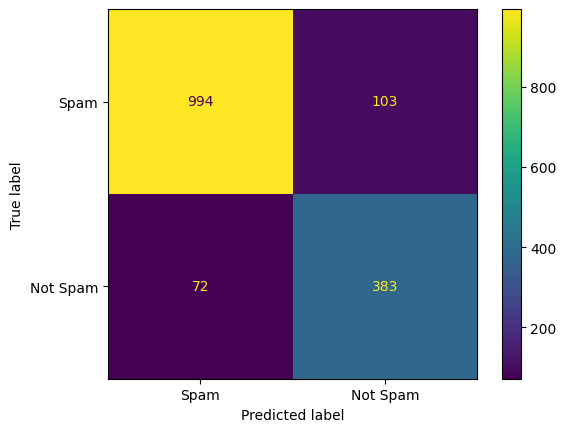

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['Spam', 'Not Spam'])

cm.plot()
plt.show()

### SVM 

In [15]:
from sklearn.svm import SVC

model = SVC(C=4)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1097
           1       0.96      0.90      0.93       455

    accuracy                           0.96      1552
   macro avg       0.96      0.94      0.95      1552
weighted avg       0.96      0.96      0.96      1552



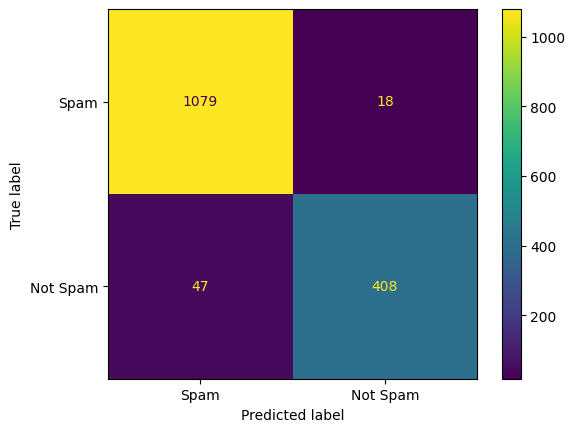

In [17]:
cnf = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['Spam', 'Not Spam'])

cm.plot()
plt.show()